In [41]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt 
import pandas as pd   # data processing, CSV file I/O

In [42]:
dataset= pd.read_csv('Position_Salaries.csv')

In [43]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [44]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [45]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [46]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

###  Fitting linear Regression to the DataSet

In [47]:
# Data set is too small thats way I use training set only & not split the data 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Fitting Polynomial Regression to the dataset

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =2) # PolynomialFeatures =minimum 2 variable(y=b0+b1x1+b2(x1)^2)
X_poly = poly_reg.fit_transform(X)


In [49]:
X_poly #add b2(x1)^2) column because of degree 2 

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [50]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Visualising the linear Regression

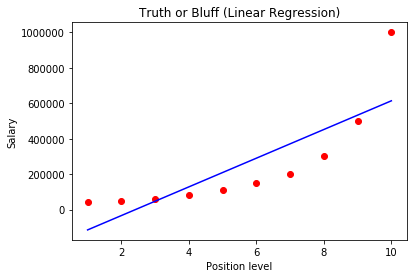

In [51]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Visualising the polynomial Regression

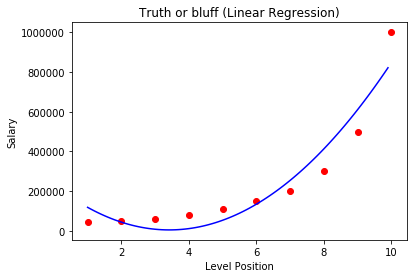

In [54]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or bluff (Linear Regression)')
plt.xlabel('Level Position')
plt.ylabel('Salary')
plt.show()